<a href="https://colab.research.google.com/github/PorjanyaBordoloi/ML_Learning/blob/main/LassoReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# creating a random dataset:
np.random.seed(40)
n_samples = 100
X_sq_Foot = np.random.randint(500, 5000, n_samples)
X_bedrroms = np.random.randint(1,6,n_samples)
X_bathrooms = np.random.randint(1, 4, size=n_samples)  # Bathrooms between 1 and 3
X_age = np.random.randint(0, 100, size=n_samples)

# Now creating the dataframe:
df = pd.DataFrame({
    'Square_Feet': X_sq_Foot,
    'Bedrooms': X_bedrroms,
    'Bathrooms': X_bathrooms,
    'Age of the property': X_age
})


In [4]:
df.head()

,Square_Feet,Bedrooms,Bathrooms,Age of the property
0,3898,4,1,92
1,3564,5,2,47
2,3840,2,2,41
3,4103,3,3,69
4,2603,4,2,68


In [6]:
# Generate house prices (target variable) with some noise:
y = (df['Square_Feet']*0.2 + df['Bedrooms']*5000 + df['Bathrooms']*8000-df['Age of the property']*100+ np.random.randint(0,5000,n_samples))
##and at the last we are adding some extra random noises

In [8]:
# Next step is to prepare the data for training:
df_train ,df_test, y_train, y_test = train_test_split(df,y,test_size=0.2,random_state=42)


In [9]:
# Step 3: Apply Polynomial Features (optional)
poly = PolynomialFeatures(degree=2)
df_train_poly = poly.fit_transform(df_train)
df_test_poly = poly.transform(df_test)

##### Fit the Lasso regression model

In [11]:
alpha = 0.1
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(df_train_poly,y_train)



Lasso(alpha=0.1)

# Step 4: Make predictions

In [17]:
y_pred_train = lasso_model.predict(df_train_poly)
y_pred_test = lasso_model.predict(df_test_poly)
print(y_pred_train)
print(y_pred_test)

[22478.89948055  7269.75912889 35774.5656834  36150.7938844
 30308.40625126 20801.41423733 21713.95535389 42322.99024255
 47486.05651143 25617.40792448 28034.70862292 15499.49029087
 18317.19011389 28039.97602782 15230.32344062 20904.91847703
 50981.82395238 18425.50796036 13552.83079412  9732.30619956
 27107.70732259 21859.48315378 29231.2093937  26017.91703596
 36403.32151816 18333.89321278 35477.30275408 28043.31185709
 46007.00736589 30141.92870769 12358.91575832 35697.63101544
 15296.15145136 22800.95247957 35039.91204112 26634.44855534
 37576.34749273 26195.7040965  16462.75450583 39173.17227468
 26582.43122224 11978.6940236  45627.50971257 12913.98780871
 29184.34857692 19083.18713583 49396.04583977 19441.49667767
 24233.81321316 34706.95222199 27226.24053499 30734.20111518
 26306.78598329 25276.14997639 23857.66561964 40756.84131301
 36185.35662744 50488.49850763 27842.12692394 33449.1628388
 39477.79876958  6703.02259391 24270.97788734 10399.81305123
 39911.67050016 20404.8245

# Step 5: Evaluate the model

In [18]:
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


In [19]:
print(mse_test)
print(mse_test)
print(r2_test)
print(r2_test)

2654930.8720193324
2654930.8720193324
0.9673656760390632
0.9673656760390632


# Visualize predictions

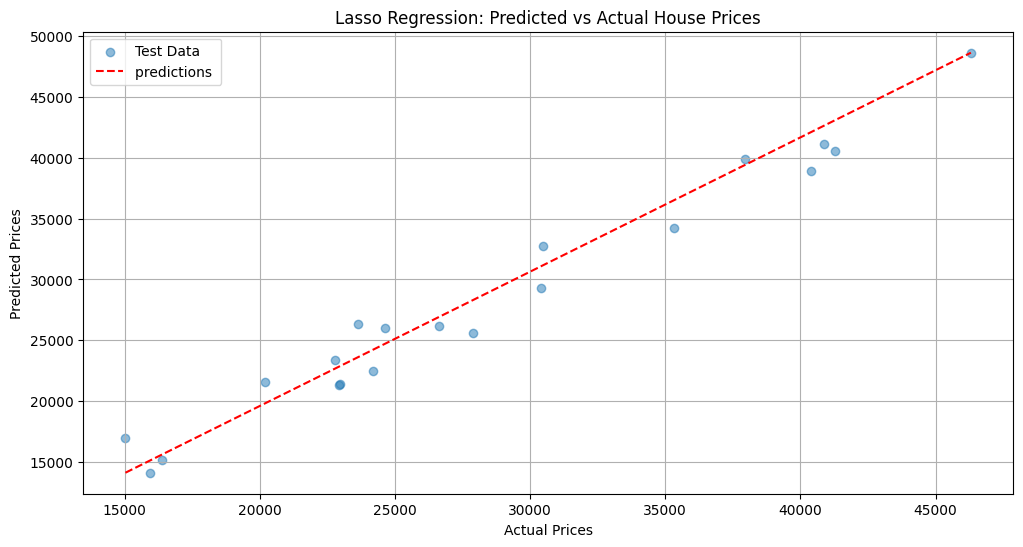

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test,y_pred_test, label='Test Data', alpha=0.5)
plt.plot([min(y_test),max(y_test)],[min(y_pred_test),max(y_pred_test)],color='red',linestyle ='--',label='predictions ')


plt.title('Lasso Regression: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()

#### What You're Seeing
####Scatter Plot of Training Data: The original data points (features vs. target) are displayed as dots, representing actual values.

####Regression Line: The straight line in your plot represents the predictions made by your regression model. This line is derived from the learned relationship between the features and the target variable.

###Significance of the Plot
####Good Fit: If the regression line closely follows the pattern of the scatter points, it indicates a good fit of the model to the data. The predictions are capturing the underlying relationship effectively.

####Trained Data Alignment: Since you're seeing the line defined by the predicted data along the trained y values, it suggests that your model is well-trained on the existing data points. It means that the model can reasonably predict the outcomes for the training dataset.

## Visualize Residuals


#### Residual Calculation: Residuals are the differences between the actual target values (y) and the predicted values (y_pred). So, we first calculate the residuals as residuals = y - y_pred.

Residual Plot: A residual plot typically shows the residuals on the y-axis and the independent variable or predicted values on the x-axis. Ideally, the residuals should be randomly distributed around zero without any apparent pattern.

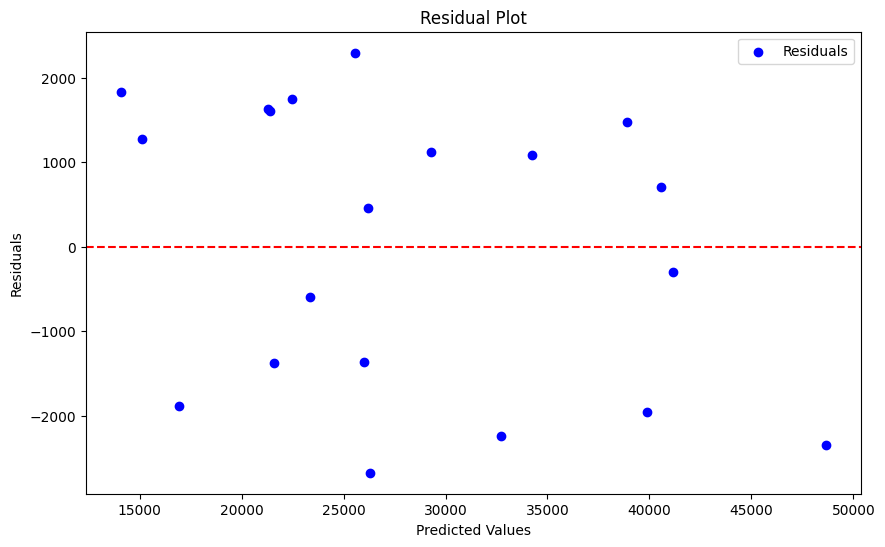

In [29]:
res = y_test - y_pred_test
plt.figure(figsize=(10,6))
plt.scatter(y_pred_test,res, color='blue',label='Residuals')

# we need a horizontal line for 0 residuals:
plt.axhline(y=0,color='red',linestyle='--')
# Adding labels and title
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

###The residuals should not form any discernible pattern (like a curve or systematic clustering). If there is a clear pattern (like a curve), it may indicate that the model is missing some underlying structure in the data.That means, our model is unbiased unlike Mr. Rathee.
